In [1]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

from   sklearn import decomposition, mixture

from   data import GTExConfig, GTExDataset
import plotutils
import exploader
import analyzer

/Users/gwg/local/dmcm


In [2]:
dataset = GTExDataset(GTExConfig(), small_images=True)
images = dataset.images.numpy()

No handles with labels found to put in legend.


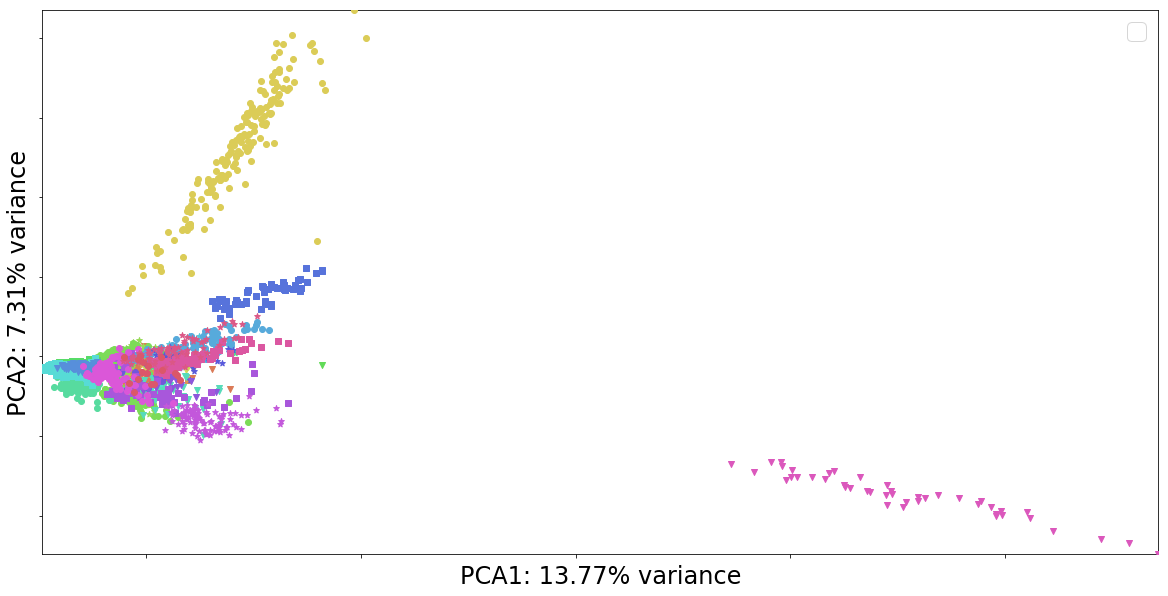

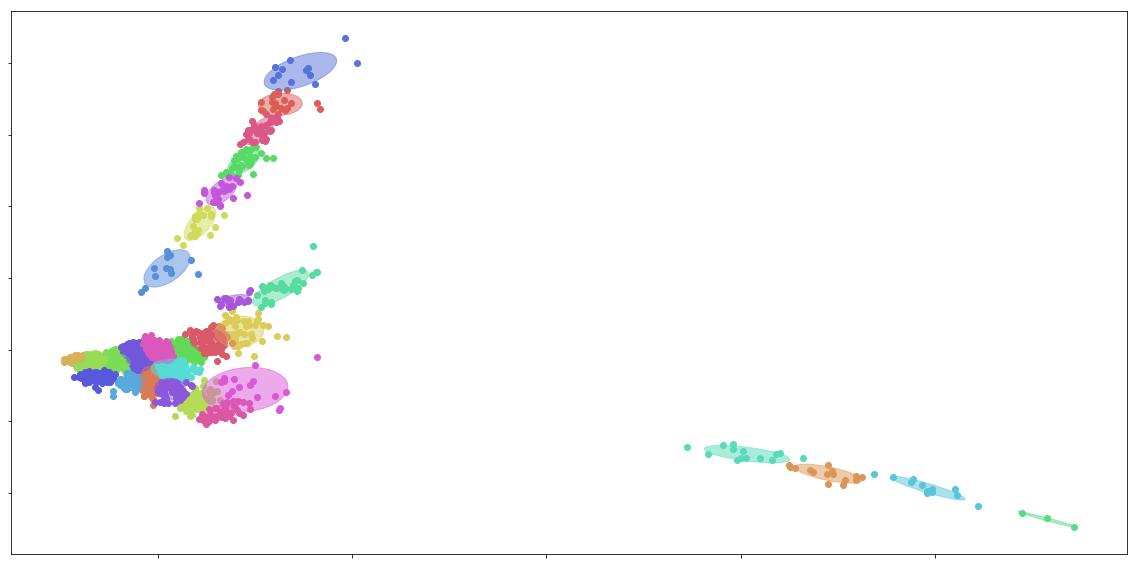

In [4]:
X = dataset.genes.numpy()

plotutils.plot_both_embeddings([X], subtitles=['Genes'], dataset=dataset)

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)
gmm = mixture.GaussianMixture(n_components=len(dataset.classes))
gmm.fit(X_pca)
Y = gmm.predict(X_pca)

plotutils.plot_gmm(X_pca, gmm=gmm)

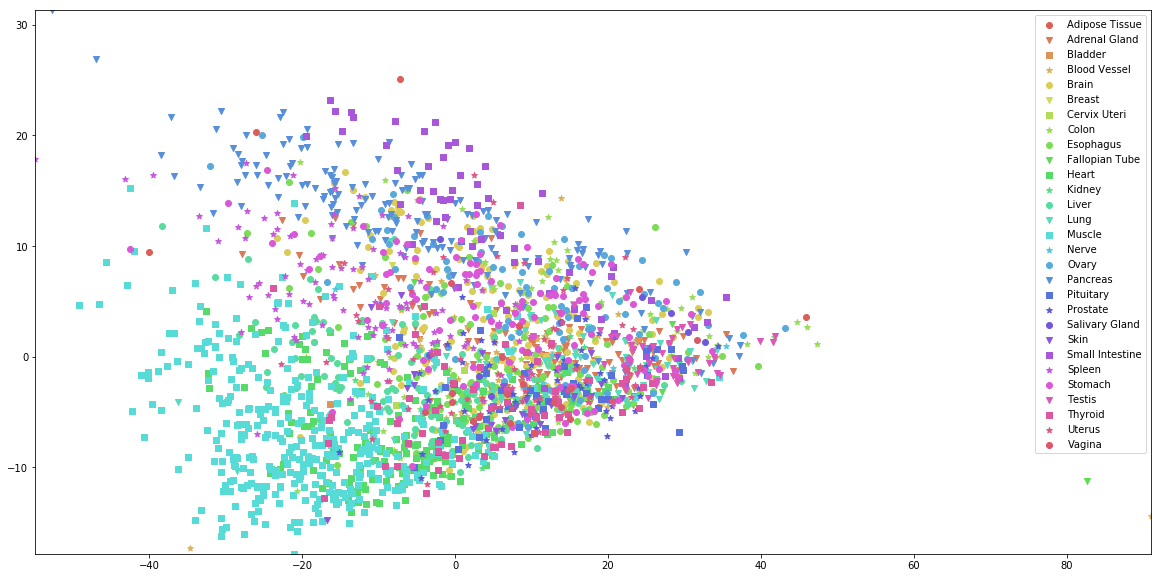

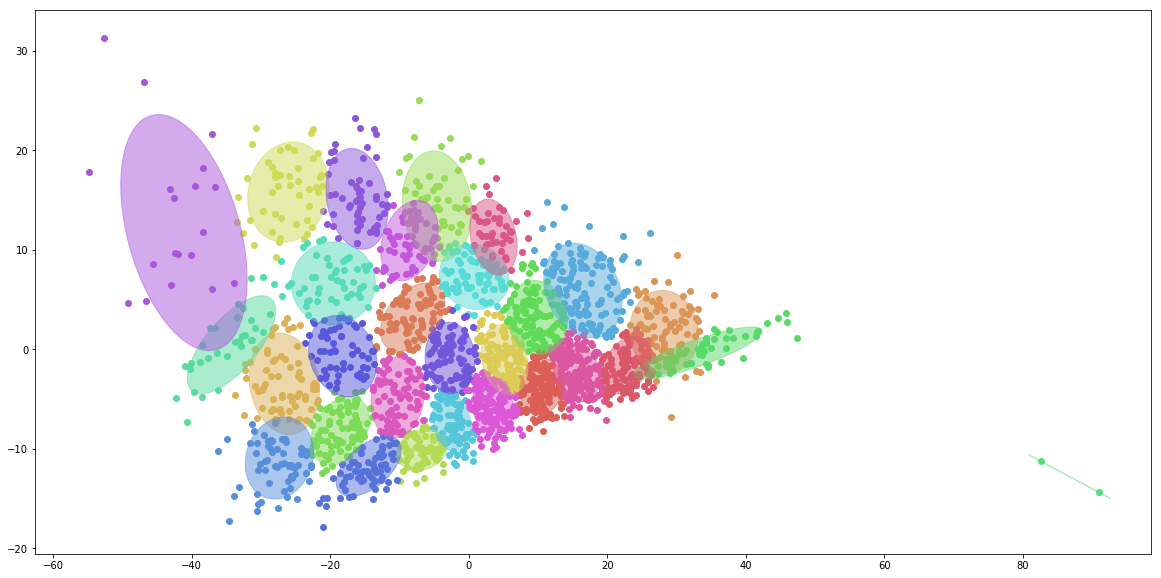

In [8]:
X = dataset.images.view(-1, 3*128*128).numpy()

pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X)

plotutils.plot_both_embeddings([X], subtitles=['Images'], dataset=dataset)

gmm = mixture.GaussianMixture(n_components=len(dataset.classes))
gmm.fit(X)
plotutils.plot_gmm(X, gmm=gmm)